In [1]:
import numpy as np
from ecp import e_divisive,e_agglomerative
import time
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HASC_TS_33.csv')
X = df.iloc[:,1:]
X.head()

,x-acc,y-acc,z-acc,x-gyro,y-gyro,z-gyro,x-mag,y-mag,z-mag
0,-1.076282,0.377944,0.983033,-0.029634,-0.018831,0.025724,1.121888,0.644974,-1.174315
1,-1.076282,0.377944,0.983033,-0.013221,0.019907,0.034401,1.121888,0.644974,-1.174315
2,-1.076282,0.377944,0.983033,0.000419,0.024077,0.034401,1.121888,0.644974,-1.174315
3,-1.028058,0.377354,0.922865,-0.001276,-0.034567,-0.003633,1.132418,0.639437,-1.179016
4,-1.028058,0.377354,0.922865,0.024964,-0.009256,0.004046,1.132418,0.639437,-1.179016


In [3]:
start= time.time()
py_divise = e_divisive.e_divisive(X = X, R=30, alpha = 1)
end = time.time()
print(py_divise)
print(end-start)

KeyboardInterrupt: 

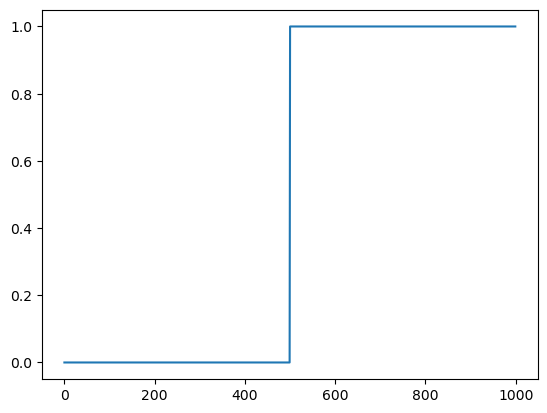

In [9]:
plt.plot(py_divise['cluster'])

In [5]:
import time  # for execution time comparison

import matplotlib.pyplot as plt  # for display purposes

import ruptures as rpt  # our package
from ruptures.metrics import hausdorff
import numpy as np

signal  = X.to_numpy()
n_bkps = 4
#algo_python = rpt.Dynp(model="l2", jump=1, min_size=2).fit(
 #   signal
#)  # written in pure python
algo_c = rpt.KernelCPD(kernel="linear", min_size=2).fit(signal)  # written in C

for label, algo in zip(
    ("Python implementation", "C implementation"), (algo_c, algo_c)
):
    start_time = time.time()
    result = algo.predict(n_bkps=n_bkps)
    print(f"{label}:\t{time.time() - start_time:.3f} s")

#bkps_python = algo_python.predict(n_bkps=n_bkps)
bkps_c = algo_c.predict(n_bkps=n_bkps)
#print(f"Python implementation:\t{bkps_python}")
print(f"C implementation:\t{bkps_c}")

Python implementation:	0.219 s
C implementation:	0.000 s
C implementation:	[1440, 3006, 4413, 6381, 7948]


In [6]:
n_bkps = 2
params = {"gamma": 1e-2}
algo_python = rpt.Dynp(model="rbf", params=params, jump=1, min_size=2).fit(
    signal
)  # written in pure python
algo_c = rpt.KernelCPD(kernel="rbf", params=params, min_size=2).fit(
    signal
)  # written in C

for label, algo in zip(
    ("Python implementation", "C implementation"), (algo_python, algo_c)
):
    start_time = time.time()
    result = algo.predict(n_bkps=n_bkps)
    print(f"{label}:\t{time.time() - start_time:.3f} s")


bkps_python = algo_python.predict(n_bkps=n_bkps)
bkps_c = algo_c.predict(n_bkps=n_bkps)
print(f"Python implementation:\t{bkps_python}")
print(f"C implementation:\t{bkps_c}")


Python implementation:	35.015 s
C implementation:	0.223 s
Python implementation:	[100, 300, 900]
C implementation:	[100, 300, 900]


In [7]:
bkps_python = algo_python.predict(n_bkps=n_bkps)
bkps_c = algo_c.predict(n_bkps=n_bkps)
print(f"Python implementation:\t{bkps_python}")
print(f"C implementation:\t{bkps_c}")
#print(f"(Hausdorff distance: {hausdorff(bkps_python, bkps_c):.0f} samples)")

Python implementation:	[4, 100, 300, 700]
C implementation:	[4, 100, 300, 700]


In [17]:
from claspy.segmentation import BinaryClaSPSegmentation
from claspy.data_loader import load_tssb_dataset, load_has_dataset

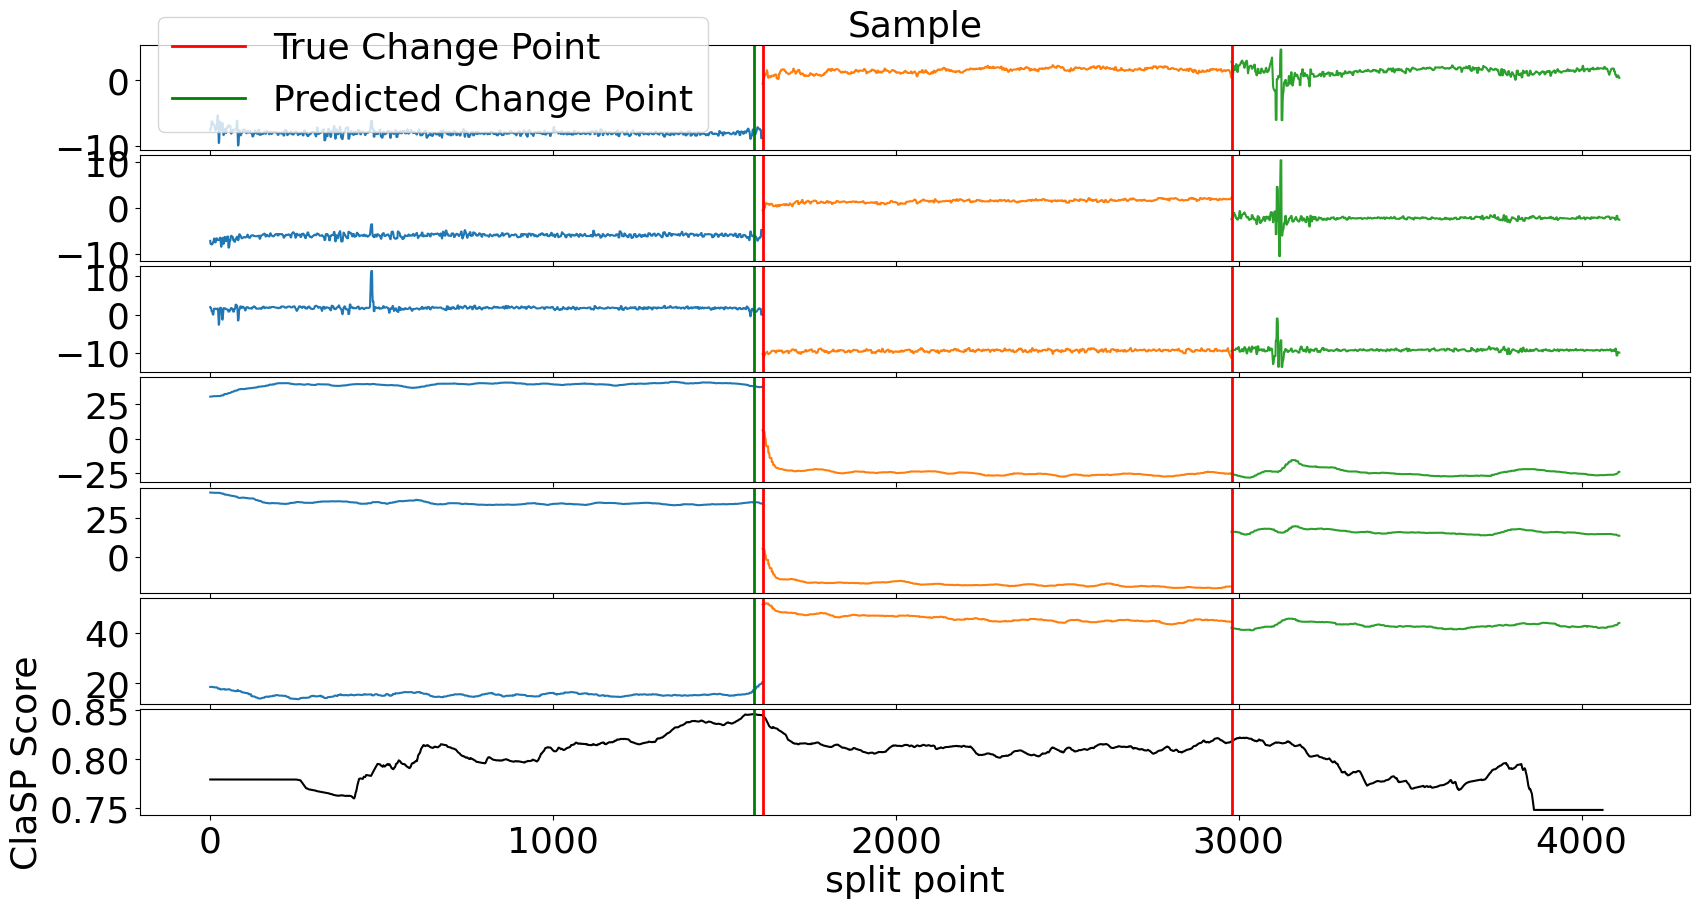

In [22]:
dataset, window_size, true_cps,labels, time_series = load_has_dataset().iloc[243,:]
#dataset.head()
#clasp = BinaryClaSPSegmentation(n_segments=5)
#X_clap = X.to_numpy().copy()
#X_clap = X_clap.copy()*20
clasp = BinaryClaSPSegmentation(window_size=window_size).fit(time_series)
clasp.plot(heading='Sample', gt_cps=true_cps)
plt.show()